In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt
# Import math Library
import math


In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  # Apply ReLU activation function by clipping values at 0.0
  activation = preactivation.clip(0.0)
  return activation


In [3]:
# Define a shallow neural network
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Make sure that input data is reshaped to a (1 x n_data) array for matrix operations
    n_data = x.size
    x = np.reshape(x, (1, n_data))

    # Compute hidden layer preactivation and activation (h1)
    h1 = ReLU(np.matmul(beta_0, np.ones((1, n_data))) + np.matmul(omega_0, x))
    # Compute output layer y by applying final weights and bias to hidden layer output
    y = np.matmul(beta_1, np.ones((1, n_data))) + np.matmul(omega_1, h1)
    return y


In [4]:
# Get parameters for model -- we can call this function to easily reset them
def get_parameters():
  # Initialize parameters for shallow neural network layers
  beta_0 = np.zeros((3, 1))   # Bias for the hidden layer (formerly theta_x0)
  omega_0 = np.zeros((3, 1))  # Weights for the hidden layer (formerly theta_x1)
  beta_1 = np.zeros((1, 1))   # Bias for the output layer (formerly phi_0)
  omega_1 = np.zeros((1, 3))  # Weights for the output layer (formerly phi_x)

  # Manually set the initialized values of parameters
  beta_0[0, 0] = 0.3
  beta_0[1, 0] = -1.0
  beta_0[2, 0] = -0.5
  omega_0[0, 0] = -1.0
  omega_0[1, 0] = 1.8
  omega_0[2, 0] = 0.65
  beta_1[0, 0] = 0.1
  omega_1[0, 0] = -2.0
  omega_1[0, 1] = -1.0
  omega_1[0, 2] = 7.0

  return beta_0, omega_0, beta_1, omega_1


In [5]:
# Utility function for plotting data
def plot_univariate_regression(x_model, y_model, x_data=None, y_data=None, sigma_model=None, title=None):
  # Ensure model data is converted to 1D arrays for plotting
  x_model = np.squeeze(x_model)
  y_model = np.squeeze(y_model)

  # Create figure and axis
  fig, ax = plt.subplots()
  # Plot model predictions
  ax.plot(x_model, y_model, label='Model Prediction')
  # Plot uncertainty band if provided
  if sigma_model is not None:
    ax.fill_between(x_model, y_model - 2 * sigma_model, y_model + 2 * sigma_model, color='lightgray', label='Uncertainty')
  # Set axis labels and plot limits
  ax.set_xlabel(r'Input, $x$')
  ax.set_ylabel(r'Output, $y$')
  ax.set_xlim([0, 1])
  ax.set_ylim([-1, 1])
  ax.set_aspect(0.5)
  # Set title if provided
  if title is not None:
    ax.set_title(title)
  # Plot data points if provided
  if x_data is not None and y_data is not None:
    ax.plot(x_data, y_data, 'ko', label='Data')
  # Show legend and plot
  plt.legend()
  plt.show()


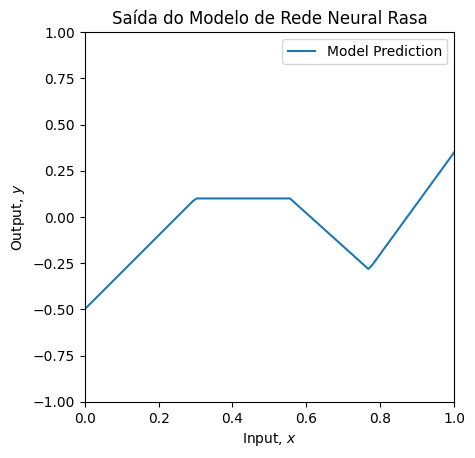

In [6]:
# Executar o modelo e gerar gráfico para visualizar a saída da rede neural

# Define os dados de entrada para a visualização
x_model = np.linspace(0, 1, 100)  # Dados de entrada de 0 a 1
beta_0, omega_0, beta_1, omega_1 = get_parameters()  # Obter parâmetros

# Gera a previsão do modelo usando os parâmetros e dados de entrada
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)

# Plota os resultados do modelo
plot_univariate_regression(x_model, y_model, title="Saída do Modelo de Rede Neural Rasa")


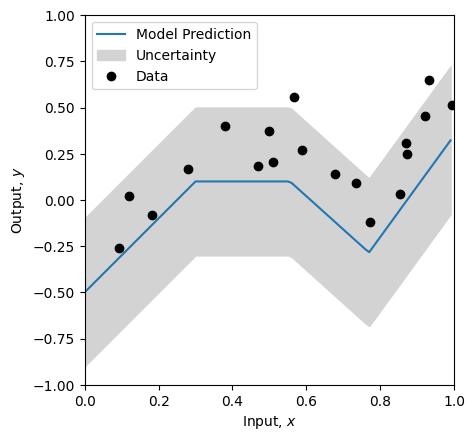

In [7]:
# Let's create some 1D training data
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.25934537,0.18195445,0.651270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.20716968,-0.08131792,0.51187806,0.16943738,0.3994327,\
                    0.019062570,0.55820410,0.452564960,-0.1183121,0.02957665,-1.24354444, \
                    0.248038840,0.26824970])

# Get parameters for the model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2

# Define a range of input values
x_model = np.arange(0,1,0.01)
# Run the model to get values to plot and plot it.
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma)


In [9]:
# Return probability under normal distribution
def normal_distribution(y, mu, sigma):

    prob = (1 / (sigma * np.sqrt(2 * math.pi))) * np.exp(-((y - mu) ** 2) / (2 * sigma ** 2))
    return prob


In [10]:
# Let's double check we get the right answer before proceeding
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.119,normal_distribution(1,-1,2.3)))

Correct answer = 0.119, Your answer = 0.119


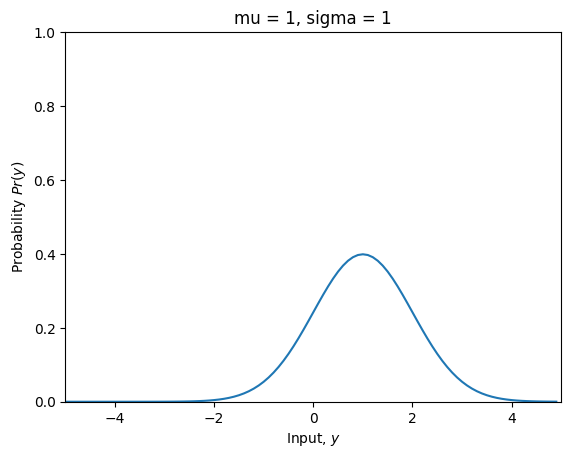

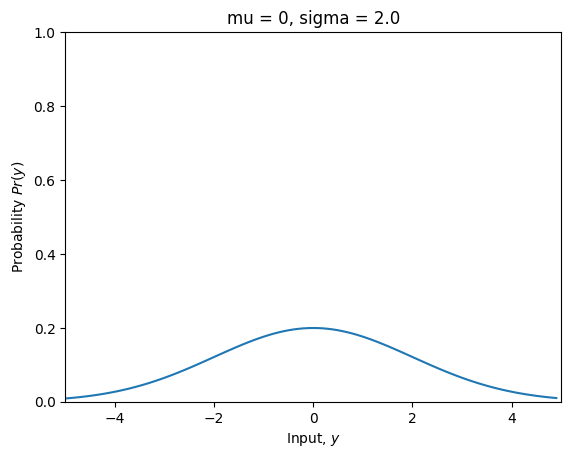

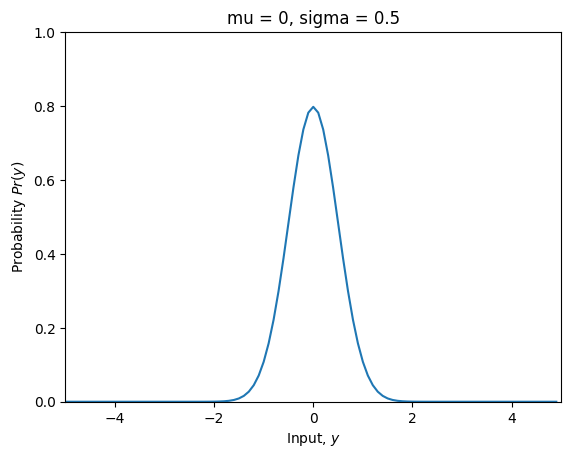

In [13]:
# 1. Mudar mu para 1 e deixar sigma = 1
y_gauss_1 = np.arange(-5, 5, 0.1)
mu_1 = 1
sigma_1 = 1.0
gauss_prob_1 = normal_distribution(y_gauss_1, mu_1, sigma_1)
fig, ax = plt.subplots()
ax.plot(y_gauss_1, gauss_prob_1)
ax.set_xlabel(r'Input, $y$'); ax.set_ylabel(r'Probability $Pr(y)$')
ax.set_xlim([-5, 5]); ax.set_ylim([0, 1.0])
plt.title('mu = 1, sigma = 1')
plt.show()

# 2. Deixar mu = 0 e mudar sigma para 2.0
y_gauss_2 = np.arange(-5, 5, 0.1)
mu_2 = 0
sigma_2 = 2.0
gauss_prob_2 = normal_distribution(y_gauss_2, mu_2, sigma_2)
fig, ax = plt.subplots()
ax.plot(y_gauss_2, gauss_prob_2)
ax.set_xlabel(r'Input, $y$'); ax.set_ylabel(r'Probability $Pr(y)$')
ax.set_xlim([-5, 5]); ax.set_ylim([0, 1.0])
plt.title('mu = 0, sigma = 2.0')
plt.show()

# 3. Deixar mu = 0 e mudar sigma para 0.5
y_gauss_3 = np.arange(-5, 5, 0.1)
mu_3 = 0
sigma_3 = 0.5
gauss_prob_3 = normal_distribution(y_gauss_3, mu_3, sigma_3)
fig, ax = plt.subplots()
ax.plot(y_gauss_3, gauss_prob_3)
ax.set_xlabel(r'Input, $y$'); ax.set_ylabel(r'Probability $Pr(y)$')
ax.set_xlim([-5, 5]); ax.set_ylim([0, 1.0])
plt.title('mu = 0, sigma = 0.5')
plt.show()


In [14]:
# Return the likelihood of all of the data under the model
def compute_likelihood(y_train, mu, sigma):

    probabilities = normal_distribution(y_train, mu, sigma)


    likelihood = np.prod(probabilities)

    return likelihood

In [15]:
# Let's test this for a homoscedastic (constant sigma) model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Set the standard deviation to something reasonable
sigma = 0.2
# Compute the likelihood
likelihood = compute_likelihood(y_train, mu_pred, sigma)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000010624,likelihood))

Correct answer = 0.000010624, Your answer = 0.000010624


In [16]:
# Return the negative log likelihood of the data under the model
def compute_negative_log_likelihood(y_train, mu, sigma):

    probabilities = normal_distribution(y_train, mu, sigma)


    log_probabilities = np.log(probabilities)


    nll = -np.sum(log_probabilities)

    return nll

In [17]:
# Let's test this for a homoscedastic (constant sigma) model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Set the standard deviation to something reasonable
sigma = 0.2
# Compute the negative log likelihood
nll = compute_negative_log_likelihood(y_train, mu_pred, sigma)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(11.452419564,nll))

Correct answer = 11.452419564, Your answer = 11.452419564


In [18]:
# Return the squared distance between the observed data (y_train) and the prediction of the model (y_pred)
def compute_sum_of_squares(y_train, y_pred):

    difference = y_train - y_pred

    squared_difference = difference ** 2

    sum_of_squares = np.sum(squared_difference)

    return sum_of_squares

In [19]:
# Let's test this again
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian, which is out best prediction of y
y_pred = mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Compute the sum of squares
sum_of_squares = compute_sum_of_squares(y_train, y_pred)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(2.020992572,sum_of_squares))

Correct answer = 2.020992572, Your answer = 2.020992572


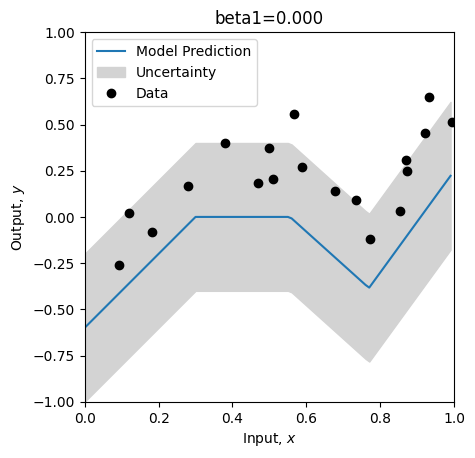

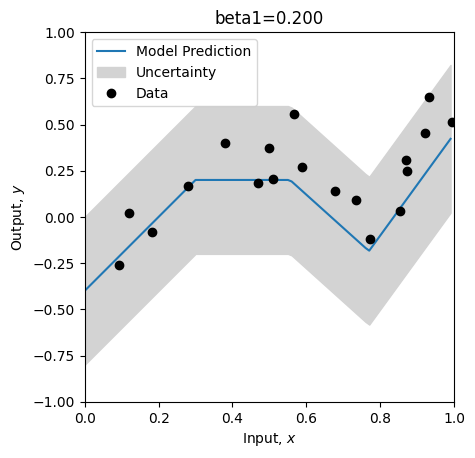

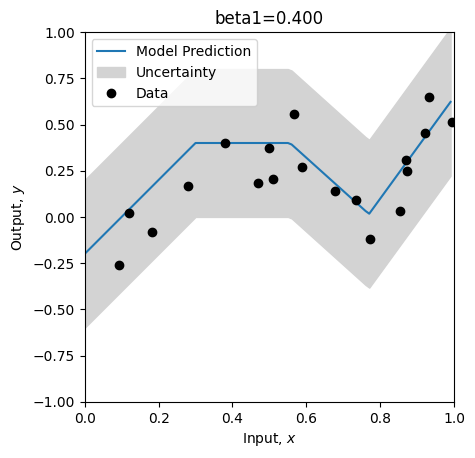

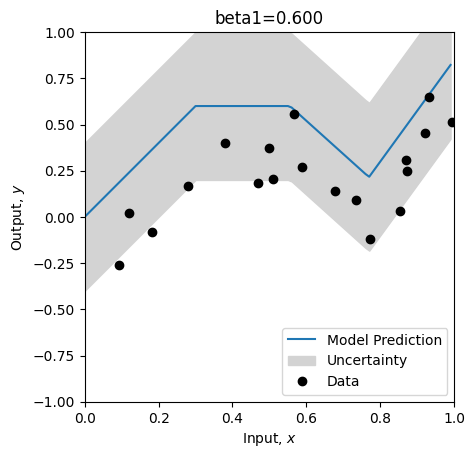

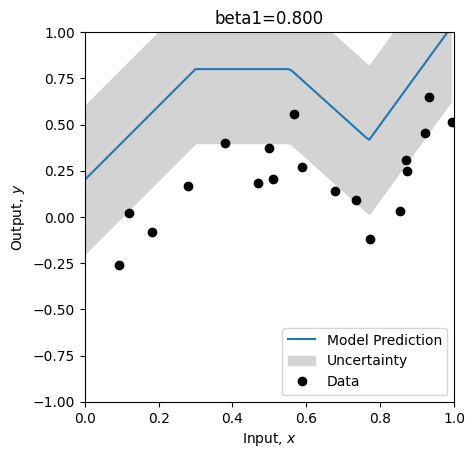

In [20]:
# Define a range of values for the parameter
beta_1_vals = np.arange(0,1.0,0.01)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)
sum_squares = np.zeros_like(beta_1_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1[0,0] = beta_1_vals[count]
  # Run the network with new parameters
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  # Compute and store the three values
  likelihoods[count] = compute_likelihood(y_train, mu_pred, sigma)
  nlls[count] = compute_negative_log_likelihood(y_train, mu_pred, sigma)
  sum_squares[count] = compute_sum_of_squares(y_train, y_pred)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))


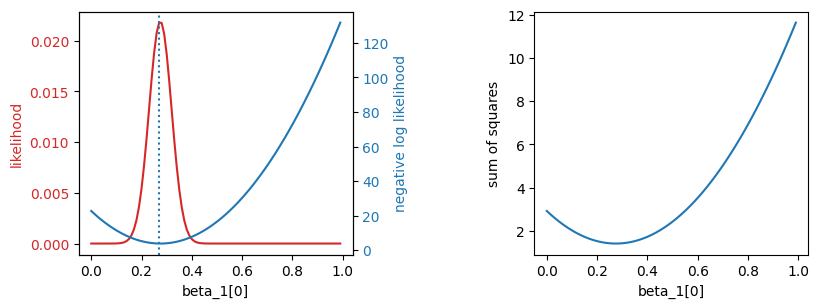

In [21]:
# Now let's plot the likelihood, negative log likelihood, and least squares as a function of the value of the offset beta1
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'

ax[0].set_xlabel('beta_1[0]')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(beta_1_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(beta_1_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(beta_1_vals, sum_squares); ax[1].set_xlabel('beta_1[0]'); ax[1].set_ylabel('sum of squares')
plt.show()

Maximum likelihood = 0.022, at beta_1=0.270
Minimum negative log likelihood = 3.826, at beta_1=0.270
Least squares = 1.411, at beta_1=0.270


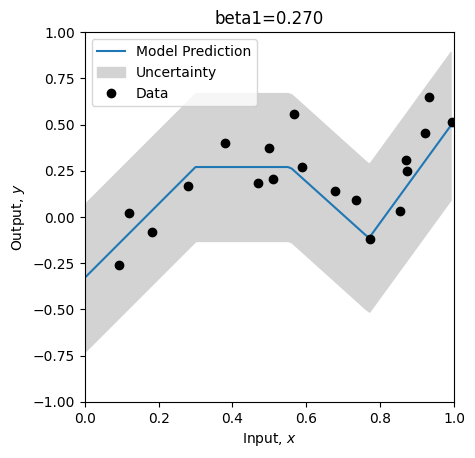

In [22]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# and the least squares solutions
# Let's check that:
print("Maximum likelihood = %3.3f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))
print("Least squares = %3.3f, at beta_1=%3.3f"%( (sum_squares[np.argmin(sum_squares)],beta_1_vals[np.argmin(sum_squares)])))

# Plot the best model
beta_1[0,0] = beta_1_vals[np.argmin(sum_squares)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))

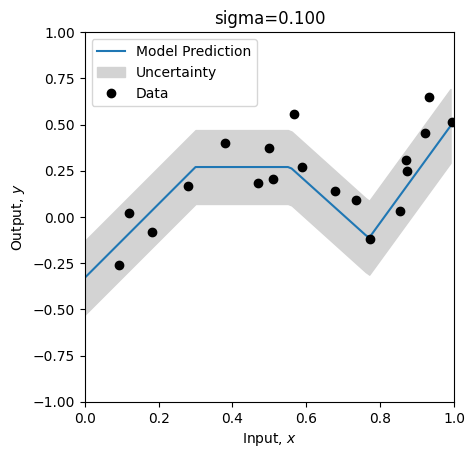

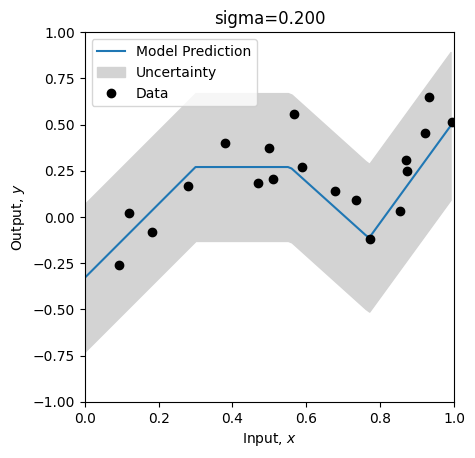

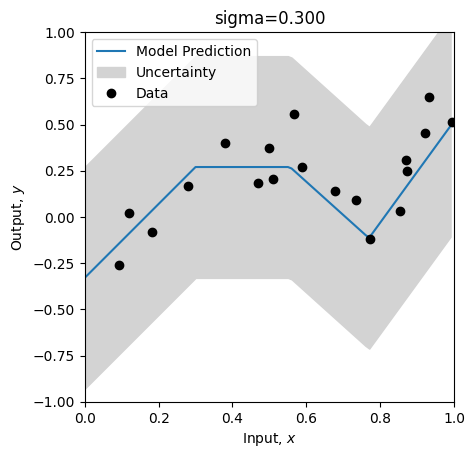

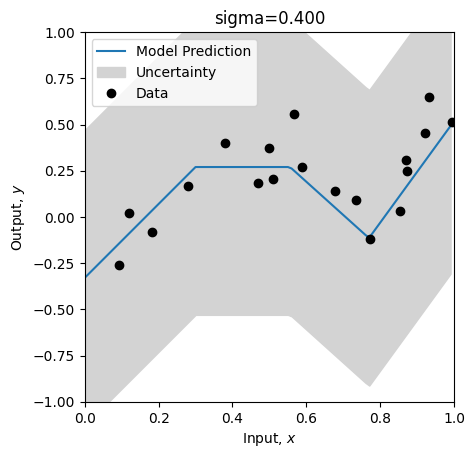

In [23]:
# Define a range of values for the parameter
sigma_vals = np.arange(0.1,0.5,0.005)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = np.zeros_like(sigma_vals)
nlls = np.zeros_like(sigma_vals)
sum_squares = np.zeros_like(sigma_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Might as well set to the best offset
beta_1[0,0] = 0.27
for count in range(len(sigma_vals)):
  # Set the value for the parameter
  sigma = sigma_vals[count]
  # Run the network with new parameters
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  # Compute and store the three values
  likelihoods[count] = compute_likelihood(y_train, mu_pred, sigma)
  nlls[count] = compute_negative_log_likelihood(y_train, mu_pred, sigma)
  sum_squares[count] = compute_sum_of_squares(y_train, y_pred)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model=sigma, title="sigma=%3.3f"%(sigma))

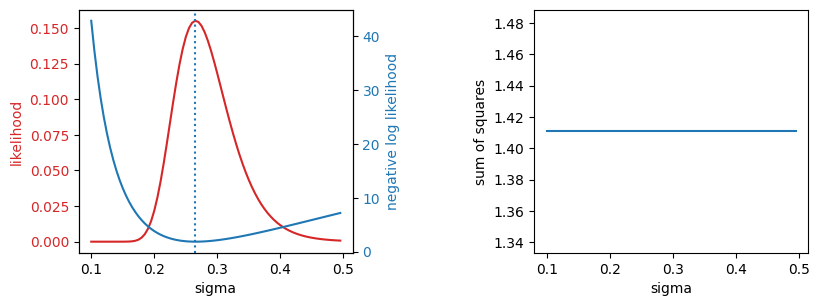

In [24]:
# Now let's plot the likelihood, negative log likelihood, and least squares as a function of the value of the standard deviation sigma
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax[0].set_xlabel('sigma')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(sigma_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(sigma_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = sigma_vals[np.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(sigma_vals, sum_squares); ax[1].set_xlabel('sigma'); ax[1].set_ylabel('sum of squares')
plt.show()

Maximum likelihood = 0.155, at sigma=0.265
Minimum negative log likelihood = 1.864, at sigma=0.265


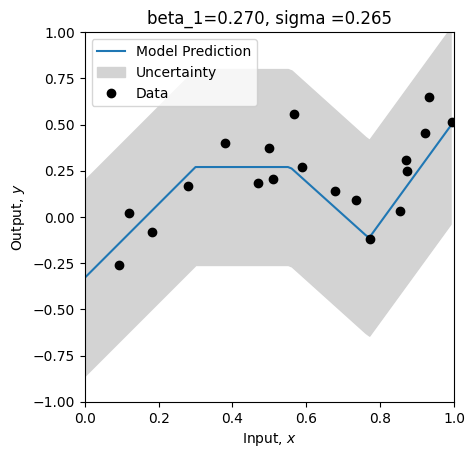

In [25]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# The least squares solution does not depend on sigma, so it's just flat -- no use here.
# Let's check that:
print("Maximum likelihood = %3.3f, at sigma=%3.3f"%( (likelihoods[np.argmax(likelihoods)],sigma_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at sigma=%3.3f"%( (nlls[np.argmin(nlls)],sigma_vals[np.argmin(nlls)])))
# Plot the best model
sigma= sigma_vals[np.argmin(nlls)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta_1=%3.3f, sigma =%3.3f"%(beta_1[0,0],sigma))